# **Задача классификации. Вероятностный алгоритм**

Для этого упражнения я выбрала датасет "Предсказание диабета". 

**Целевой признак** - поле **Outcome**, где 
*   0 - у женщины нет диабета, 
*   1 - у женщины есть диабет.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier #буду использовать случайный лес

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_control.csv', sep = ',')

В рамках другого блокнота я уже проводила селекцию признаков этого датасета. И чтобы не повторяться сразу возьму 4 самых значимых из них:
*   **Glucose:** уровень глюкозы в крови
*   **BMI:** индекс массы тела
*   **Age:** возраст
*   **Pregnancies:** количество беременностей
*   **Outcome:** диагноз. 1 если есть диабет, 0 если нет диабета.

In [3]:
df_cut = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']]
df_cut = df_cut.dropna()

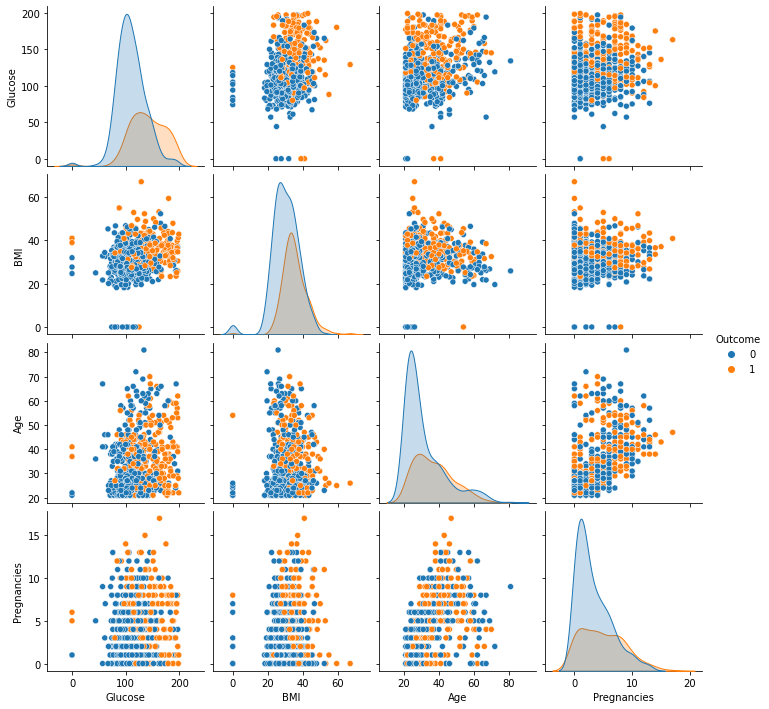

In [4]:
sns.pairplot(df_cut, hue = 'Outcome')

**Идея: можно запустить один из известных алгоритмов, но попросить его выдать вероятности.**

In [5]:
model = RandomForestClassifier(max_depth = 2, random_state = 0) #пеньки глубины два
model.fit(df_cut[['Glucose', 'BMI', 'Age', 'Pregnancies']].values.reshape(-1,4), y = df_cut['Outcome'].values)

RandomForestClassifier(max_depth=2, random_state=0)

**Загружаю тестовую выборку:**

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_control.csv', delimiter = ',')
df_test_cut = df_test[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']]
df_test_cut = df_test_cut.dropna()

**Вызываю функцию predict_proba, чтобы получить вероятности.**

In [7]:
result = model.predict_proba(df_test_cut[['Glucose', 'BMI', 'Age', 'Pregnancies']].values.reshape(-1,4))    #predict probability (предсказать вероятность)
#результат предсказания складываю в таблицу result
print(result)    #это вероятности принадлежности классам

[[0.41729411 0.58270589]
 [0.800594   0.199406  ]
 [0.41151685 0.58848315]
 ...
 [0.77105639 0.22894361]
 [0.46355011 0.53644989]
 [0.69899169 0.30100831]]


**Какой смысл у чисел выше?**

Первая строка относится к 1му объекту тестовой выборки. Для этого объекта сказано, что с веротностью 0.41729411 он принадлежит к одному классу, а с вероятностью 0.58270589 - к другому.

Оформим эти результаты:

In [8]:
#формируем новые столбцы
df_test_cut['pr class 0'] = result[:,0]    #вероятность класса 0, т.е. того, что человек не имеет диабета
df_test_cut['pr class 1'] = result[:,1]    #вероятность класса 1, т.е. того, что у человека диабет
df_test_cut.head()

,Glucose,BMI,Age,Pregnancies,Outcome,pr class 0,pr class 1
0,148,33.6,50,6,1,0.417294,0.582706
1,85,26.6,31,1,0,0.800594,0.199406
2,183,23.3,32,8,1,0.411517,0.588483
3,89,28.1,21,1,0,0.871821,0.128179
4,137,43.1,33,0,1,0.467944,0.532056


**Предсказание вероятности, а не точного ответа, позволяет сделать поведение алгоритма более гибким.** Мы можем устанавливать разные пороги и смотреть, какие люди попадают в тот или иной порог.
Например, следующая строчка кода выведет список людей с реальным положительным диагнозом (есть диабет, Outcome = 1), для которых при этом расчитанная вероятность быть больными **<0.5**.

In [9]:
df_test_cut[(df_test_cut['pr class 1'] < 0.5) & (df_test_cut['Outcome'] == 1)].head()

,Glucose,BMI,Age,Pregnancies,Outcome,pr class 0,pr class 1
6,78,31.0,26,3,1,0.778808,0.221192
9,125,0.0,54,8,1,0.728860,0.271140
15,100,30.0,32,7,1,0.635824,0.364176
16,118,45.8,31,0,1,0.613650,0.386350
17,107,29.6,31,7,1,0.644000,0.356000


Играя с этим параметром, можно разбить выборку на группы, у которых возрастает или убывает вероятность принадлежности к тому или иному классу.

Более того, можно упорядочить людей по возрастанию или убыванию принадлежности к тому или иному классу. И посмотрим, как с точки зрения иск-го интеллекта (ИИ) будет выглядеть наша популяция. А именно, **упорядочив их по вероятности принадлежности к классу диабет-положительных, мы поймем, какие люди по мнению ИИ считаются более здоровыми.**

In [10]:
df_test_cut.sort_values(by = 'pr class 1', ascending = True).head(50)

,Glucose,BMI,Age,Pregnancies,Outcome,pr class 0,pr class 1
526,97,18.2,21,1,0,0.922795,0.077205
617,68,20.1,23,2,0,0.922795,0.077205
55,73,23.0,21,1,0,0.922795,0.077205
60,84,0.0,21,2,0,0.922795,0.077205
585,93,22.5,22,1,0,0.922795,0.077205
32,88,24.8,22,3,0,0.922795,0.077205
75,0,24.7,22,1,0,0.922795,0.077205
81,74,0.0,22,2,0,0.922795,0.077205
27,97,23.2,22,1,0,0.922795,0.077205
252,90,24.4,24,2,0,0.922795,0.077205
